In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cols="""word_freq_make,
word_freq_address,      
word_freq_all,          
word_freq_3d,           
word_freq_our,          
word_freq_over,         
word_freq_remove,       
word_freq_internet,     
word_freq_order,        
word_freq_mail,         
word_freq_receive,      
word_freq_will,         
word_freq_people,       
word_freq_report,       
word_freq_addresses,    
word_freq_free,         
word_freq_business,     
word_freq_email,        
word_freq_you,          
word_freq_credit,       
word_freq_your,         
word_freq_font,         
word_freq_000,          
word_freq_money,        
word_freq_hp,           
word_freq_hpl,          
word_freq_george,       
word_freq_650,          
word_freq_lab,          
word_freq_labs,         
word_freq_telnet,       
word_freq_857,          
word_freq_data,         
word_freq_415,          
word_freq_85,           
word_freq_technology,   
word_freq_1999,         
word_freq_parts,        
word_freq_pm,           
word_freq_direct,       
word_freq_cs,           
word_freq_meeting,      
word_freq_original,     
word_freq_project,      
word_freq_re,           
word_freq_edu,          
word_freq_table,        
word_freq_conference,   
char_freq_;,            
char_freq_(,            
char_freq_[,            
char_freq_!,            
char_freq_$,            
char_freq_#,            
capital_run_length_average, 
capital_run_length_longest, 
capital_run_length_total"""

columns=[]
for c in cols.split(','):
  if(c.strip()):
    columns.append(c.strip())
columns.append('Spam')


In [ ]:
print(len(columns))

58


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/spambase/spambase.data',names=columns)

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
df.shape

(4601, 58)

In [ ]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [ ]:
x=df.shape[0]
df.drop_duplicates(inplace=True)
if(df.shape[0]==x):
  print("No duplicates")
else:
  print(x-df.shape[0]," duplicates removed")

391  duplicates removed


In [ ]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

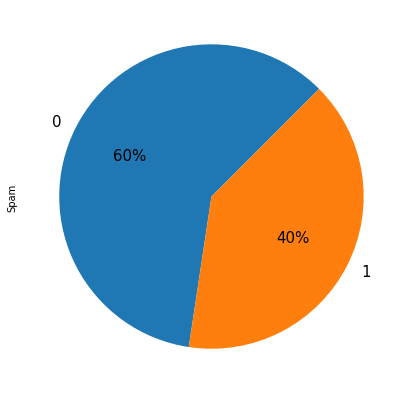

In [ ]:
df['Spam'].value_counts().plot(kind='pie',autopct="%0.f%%",fontsize=15,figsize=(7,7),startangle=45)

In [ ]:
print(df['Spam'].value_counts())

xf = df.columns
X = df.drop(['Spam'],axis=1)
Y = df['Spam']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df = pd.DataFrame(X, columns=xf)
df['Spam'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

0    2531
1    1679
Name: Spam, dtype: int64

Class distribution after applying SMOTE Technique:
1    2531
0    2531
Name: Spam, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(['Spam'],axis=1)
Y = df['Spam']

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print(Train_X.shape, Test_X.shape)
print(Train_Y.shape, Test_Y.shape)

(4049, 57) (1013, 57)
(4049,) (1013,)


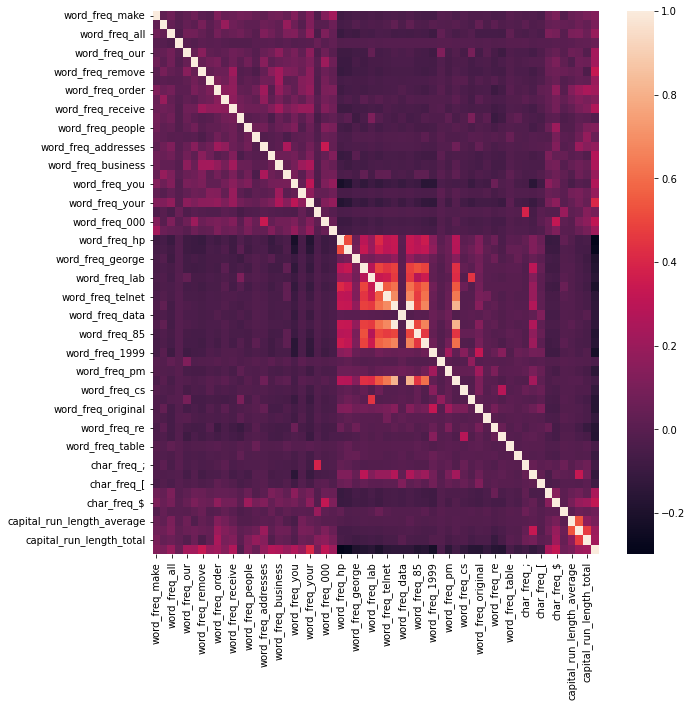

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(Train_X, Train_Y)

Test_Y_pred1 = model1.predict(Test_X)

print("Train score is:", model1.score(Train_X, Train_Y))
print("Test score is:",model1.score(Test_X,Test_Y))

Train score is: 0.901704124475179
Test score is: 0.926949654491609


In [ ]:
from sklearn.svm import SVC

model2 = SVC()

model2.fit(Train_X, Train_Y.values.ravel())
Test_Y_pred2 = model2.predict(Test_X)

print("Train score is:", model2.score(Train_X, Train_Y))
print("Test score is:", model2.score(Test_X,Test_Y))

Train score is: 0.9473944183749073
Test score is: 0.9427443237907206


In [ ]:
import keras
from keras import *
from keras import layers
from keras.layers import Embedding, Conv1D, GlobalMaxPooling2D, Dense, Dropout
from keras.models import Model
from keras.preprocessing import *
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier



def fun():
    model = keras.models.Sequential()
    model.add(Dense(57,input_dim =57,activation = 'relu',kernel_initializer='random_uniform'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))            
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

model3 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

model3.fit(Train_X, Train_Y.values.ravel())

Train_Y_pred3 = model3.predict(Train_X)
Test_Y_pred3 = model3.predict(Test_X)

print("Train score is:", accuracy_score(Train_Y,Train_Y_pred3))
print("Test score is:", accuracy_score(Test_Y,Test_Y_pred3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/100
64/64 [==============================] - 2s 5ms/step - loss: 0.6439 - accuracy: 0.6276
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.8592
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.9042
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9145
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9229
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9247
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9269
Epoch 8/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9304
Epoch 9/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9336
Epoch 10/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9316
Epoch 11/

In [ ]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(Train_X, Train_Y)

Test_Y_pred4 = model4.predict(Test_X)

print("Train score is:", model4.score(Train_X, Train_Y))
print("Test score is:",model4.score(Test_X,Test_Y))

Train score is: 0.8461348481106447
Test score is: 0.857847976307996
